In [1]:
import numpy as np
from my_functions import *
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
split_converter = lambda s: s.split()
sum_flags = lambda s: np.sum(np.array(s.split()).astype(float))
tile_name = lambda s: s[:8]

cat = pd.read_csv('csv/minijpas.MagAB_aper3_photoz_gaia_4.csv', sep=',', header=1,
    converters={2: split_converter, 3: split_converter, 4: sum_flags,
    5: sum_flags, 21: tile_name})

cat = cat[np.array([len(x) for x in cat['MAG_APER_3_0']]) != 0]
cat = cat[np.array(cat['FLAGS']) + np.array(cat['MASK_FLAGS']) == 0] 

In [4]:
def expfit(x, a, b, c):
    return a * np.exp(b * x + c)

def linfit(x, a, b):
    return a * x + b

In [12]:
params_tiles = []
for tile in ['AEGIS001', 'AEGIS002', 'AEGIS003', 'AEGIS004']:
    err_fit_params = []

    flx = np.stack(
        cat['MAG_APER_3_0'].to_numpy()[np.where(cat['name'] == tile)[0]]
    ).astype(float).T
    flx_err = np.stack(
        cat['MAG_ERR_APER_3_0'].to_numpy()[np.where(cat['name'] == tile)[0]]
    ).astype(float).T

    for nb_c in range(60):
        # mask = (flx[nb_c] < 25)
        mask = np.ones(flx[nb_c].shape).astype(bool)
        p0 = [1., 1., 1.]
        p, var = curve_fit(expfit, flx[nb_c, mask], flx_err[nb_c, mask], p0=p0)
        err_fit_params.append(p)

    params_tiles.append(err_fit_params)

RuntimeError: Optimal parameters not found: gtol=0.000000 is too small, func(x) is orthogonal to the columns of
  the Jacobian to machine precision.

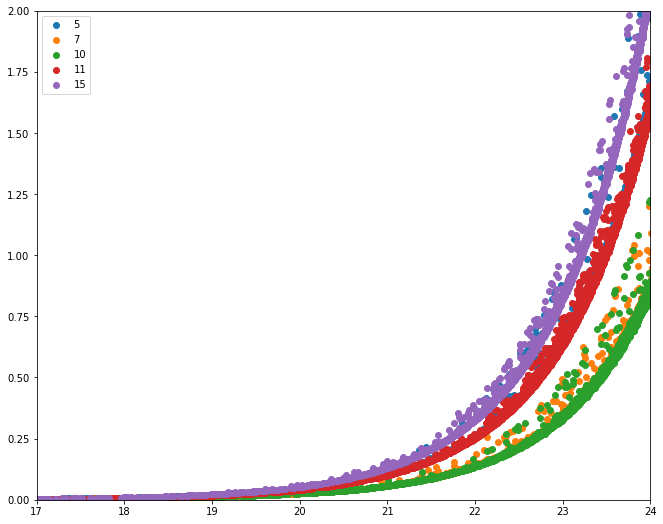

In [20]:
fig, ax = plt.subplots(figsize=(11, 9))

nb_c = 11
a = err_fit_params[nb_c][0]
b = err_fit_params[nb_c][1]
c = err_fit_params[nb_c][2]

mask = (flx[nb_c] < 25)

for nb_c in [5, 7, 10, 11, 15]:
    ax.scatter(flx[nb_c, mask], flx_err[nb_c, mask], label=nb_c)

x_Arr = np.linspace(1e-20, 1e-16, 100)
# ax.plot(x_Arr, expfit(x_Arr, a, b), zorder=99, c='red')

ax.set_xlim((17, 24))
ax.set_ylim((0, 2))

ax.legend()

# ax.set_xscale('log')
# ax.set_yscale('log')

plt.show()

In [7]:
# np.save('npy/err_fit_params_minijpas', np.array(err_fit_params))

In [8]:
for i in range(len(err_fit_params)):
    a = err_fit_params[i][0]
    b = err_fit_params[i][1]
    c = err_fit_params[i][2]
    print(expfit(24, a, b, c))

IndexError: index 2 is out of bounds for axis 0 with size 2